In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
from pyspark.sql import functions as F

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
spark = SparkSession.builder.getOrCreate()

In [9]:
WorldCup = spark.read.csv("C:\\Users\\ayant\\Downloads\\WorldCupData\\WorldCups.csv", header= True)

In [10]:
WorldCup.show()

+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|Year|     Country|    Winner|    Runners-Up|      Third|        Fourth|GoalsScored|QualifiedTeams|MatchesPlayed|Attendance|
+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|1930|     Uruguay|   Uruguay|     Argentina|        USA|    Yugoslavia|         70|            13|           18|   590.549|
|1934|       Italy|     Italy|Czechoslovakia|    Germany|       Austria|         70|            16|           17|   363.000|
|1938|      France|     Italy|       Hungary|     Brazil|        Sweden|         84|            15|           18|   375.700|
|1950|      Brazil|   Uruguay|        Brazil|     Sweden|         Spain|         88|            13|           22| 1.045.246|
|1954| Switzerland|Germany FR|       Hungary|    Austria|       Uruguay|        140|            16|           26|   768.607|


In [11]:
WorldCup.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Runners-Up: string (nullable = true)
 |-- Third: string (nullable = true)
 |-- Fourth: string (nullable = true)
 |-- GoalsScored: string (nullable = true)
 |-- QualifiedTeams: string (nullable = true)
 |-- MatchesPlayed: string (nullable = true)
 |-- Attendance: string (nullable = true)



In [12]:
WorldCup.describe().show(truncate=False)

+-------+------------------+---------+---------+----------+-------+----------+-----------------+-----------------+------------------+------------------+
|summary|Year              |Country  |Winner   |Runners-Up|Third  |Fourth    |GoalsScored      |QualifiedTeams   |MatchesPlayed     |Attendance        |
+-------+------------------+---------+---------+----------+-------+----------+-----------------+-----------------+------------------+------------------+
|count  |20                |20       |20       |20        |20     |20        |20               |20               |20                |20                |
|mean   |1974.8            |null     |null     |null      |null   |null      |118.95           |21.25            |41.8              |635.1396666666666 |
|stddev |25.582889018371656|null     |null     |null      |null   |null      |32.97283570966928|7.268352452132539|17.218716866431013|228.84694120452357|
|min    |1930              |Argentina|Argentina|Argentina |Austria|Austria   |102 

In [13]:
print((WorldCup.count(), len(WorldCup.columns)))

(20, 10)


In [14]:
WorldCup.show()

+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|Year|     Country|    Winner|    Runners-Up|      Third|        Fourth|GoalsScored|QualifiedTeams|MatchesPlayed|Attendance|
+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|1930|     Uruguay|   Uruguay|     Argentina|        USA|    Yugoslavia|         70|            13|           18|   590.549|
|1934|       Italy|     Italy|Czechoslovakia|    Germany|       Austria|         70|            16|           17|   363.000|
|1938|      France|     Italy|       Hungary|     Brazil|        Sweden|         84|            15|           18|   375.700|
|1950|      Brazil|   Uruguay|        Brazil|     Sweden|         Spain|         88|            13|           22| 1.045.246|
|1954| Switzerland|Germany FR|       Hungary|    Austria|       Uruguay|        140|            16|           26|   768.607|


In [15]:
WorldCup.withColumn("Attendance", F.expr("replace(Attendance, '.', '')")).show()

+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|Year|     Country|    Winner|    Runners-Up|      Third|        Fourth|GoalsScored|QualifiedTeams|MatchesPlayed|Attendance|
+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|1930|     Uruguay|   Uruguay|     Argentina|        USA|    Yugoslavia|         70|            13|           18|    590549|
|1934|       Italy|     Italy|Czechoslovakia|    Germany|       Austria|         70|            16|           17|    363000|
|1938|      France|     Italy|       Hungary|     Brazil|        Sweden|         84|            15|           18|    375700|
|1950|      Brazil|   Uruguay|        Brazil|     Sweden|         Spain|         88|            13|           22|   1045246|
|1954| Switzerland|Germany FR|       Hungary|    Austria|       Uruguay|        140|            16|           26|    768607|


In [16]:
WorldCup_new = WorldCup.withColumn("Attendance", F.expr("replace(Attendance, '.', '')"))

In [17]:
WorldCup_new.describe(["Attendance"]).show()

+-------+-----------------+
|summary|       Attendance|
+-------+-----------------+
|  count|               20|
|   mean|       1872882.35|
| stddev|1071842.147757641|
|    min|          1045246|
|    max|           893172|
+-------+-----------------+



In [18]:
WorldCup_new.show()

+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|Year|     Country|    Winner|    Runners-Up|      Third|        Fourth|GoalsScored|QualifiedTeams|MatchesPlayed|Attendance|
+----+------------+----------+--------------+-----------+--------------+-----------+--------------+-------------+----------+
|1930|     Uruguay|   Uruguay|     Argentina|        USA|    Yugoslavia|         70|            13|           18|    590549|
|1934|       Italy|     Italy|Czechoslovakia|    Germany|       Austria|         70|            16|           17|    363000|
|1938|      France|     Italy|       Hungary|     Brazil|        Sweden|         84|            15|           18|    375700|
|1950|      Brazil|   Uruguay|        Brazil|     Sweden|         Spain|         88|            13|           22|   1045246|
|1954| Switzerland|Germany FR|       Hungary|    Austria|       Uruguay|        140|            16|           26|    768607|


In [21]:
WorldCup_new.createOrReplaceTempView("WorldCup")

max_attendance_query = """
SELECT Year, MAX(CAST(Attendance AS INT)) AS max_attendance
FROM WorldCup
GROUP BY Year
ORDER BY max_attendance DESC
LIMIT 1
"""

max_attendance = spark.sql(max_attendance_query)


In [22]:
max_attendance.show()

+----+--------------+
|Year|max_attendance|
+----+--------------+
|1994|       3587538|
+----+--------------+



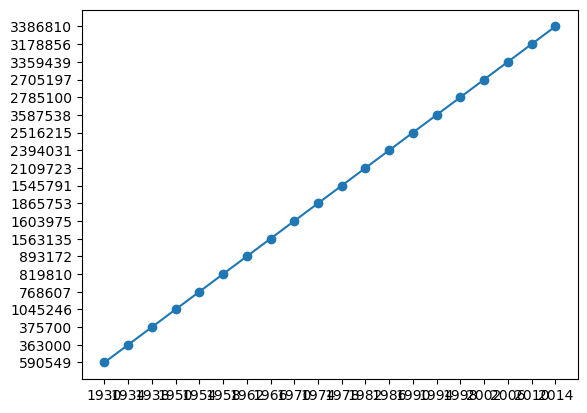

In [23]:
pandas_WorldCup = WorldCup_new.select("Year", "Attendance").toPandas()

years = pandas_WorldCup["Year"]
attendance = pandas_WorldCup["Attendance"]

plt.plot(years, attendance, marker='o', linestyle='-') 
    
# function to show the plot 
plt.show() 

In [25]:
min_attendance_query = """
SELECT Year, MIN(CAST(Attendance AS INT)) AS min_attendance
FROM WorldCup
GROUP BY Year
ORDER BY min_attendance ASC
LIMIT 1
"""

min_attendance = spark.sql(min_attendance_query)


In [26]:
min_attendance.show()

+----+--------------+
|Year|min_attendance|
+----+--------------+
|1934|        363000|
+----+--------------+



In [28]:
most_goals_scored = """
SELECT Country, MAX(CAST(GoalsScored AS INT)) AS most_goals
FROM WorldCup
GROUP BY Country
ORDER BY most_goals DESC
LIMIT 1
"""

most_goals = spark.sql(most_goals_scored)

In [29]:
most_goals.show()

+-------+----------+
|Country|most_goals|
+-------+----------+
| France|       171|
+-------+----------+

